Linear Regression MSE: 0.6629874283048177


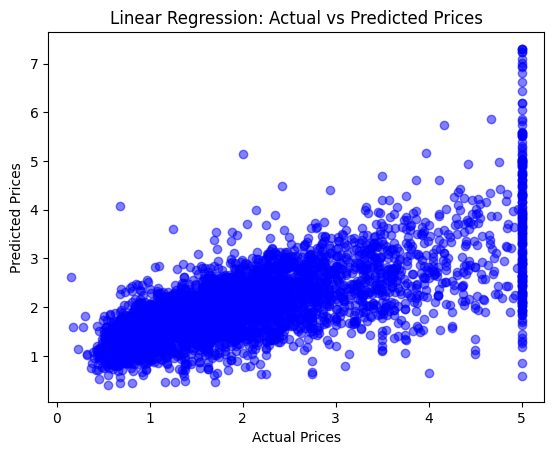

Polynomial Regression MSE: 18.460267222145085


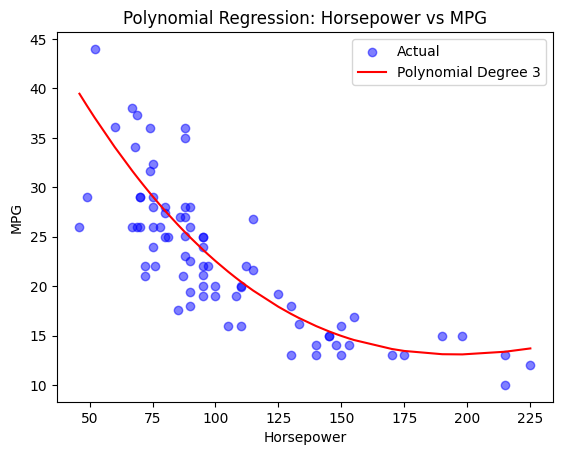

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

# Load Boston Housing Dataset for Linear Regression
boston = fetch_california_housing()
X_boston = boston.data[:, :2]  # Selecting first two features for simplicity
y_boston = boston.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')

# Plot Predictions vs Actual
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Load Auto MPG Dataset for Polynomial Regression
auto_mpg = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv").dropna()
X_auto = auto_mpg[['horsepower']].values
y_auto = auto_mpg['mpg'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

# Train Polynomial Regression Model
degree = 3  # Choosing a cubic polynomial model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}')

# Plot Polynomial Regression Results
X_sorted = np.sort(X_test, axis=0)
y_sorted = poly_model.predict(X_sorted)
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_sorted, y_sorted, color='red', label=f'Polynomial Degree {degree}')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression: Horsepower vs MPG')
plt.legend()
plt.show()
